In [11]:
import numpy as np  # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para gráficos
import pandas as pd  # Para manipulación de datos (DataFrames)
import seaborn as sns  # Para visualizaciones avanzadas
from sklearn.model_selection import train_test_split  # Para dividir datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Para evaluar el modelo

In [12]:
# Cargar la nueva base de datos
df = pd.read_csv("Advertising_Data.csv")

In [20]:
# Tabla de estadísticas descriptivas
print("\nTabla de estadísticas descriptivas:")
print(df.describe())

# Tabla de matriz de correlación
print("\nTabla de matriz de correlación:")
print(correlation_matrix)

# Tabla de métricas de evaluación
print("\nTabla de métricas de evaluación:")
metrics = pd.DataFrame({
    "Métrica": ["Error Absoluto Medio (MAE)", "Error Cuadrático Medio (MSE)",
                "Raíz del Error Cuadrático Medio (RMSE)", "Coeficiente de Determinación (R²)"],
    "Valor": [mae, mse, rmse, r2]
})
print(metrics)


Tabla de estadísticas descriptivas:
               TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
count  300.000000  300.000000  300.000000    300.000000            300.000000   
mean   517.431000  502.644933  512.444133    489.800100            465.732567   
std    288.114792  275.842369  285.422376    273.883915            288.314080   
min      1.040000    3.630000   14.860000     11.690000              0.770000   
25%    273.090000  277.912500  250.530000    265.612500            214.480000   
50%    513.970000  533.020000  528.965000    486.385000            480.355000   
75%    774.275000  745.005000  763.345000    695.117500            703.092500   
max    998.100000  995.320000  999.230000    996.160000            999.830000   

       Affiliate_Marketing  Product_Sold  
count           300.000000    300.000000  
mean            484.430633   7031.523333  
std             277.955458   1703.614951  
min               6.740000   2259.000000  
25%             26

In [13]:
# Análisis exploratorio de datos (EDA)
print(df.info())  # Muestra información general del DataFrame
print(df.describe())  # Muestra estadísticas descriptivas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB
None
               TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
count  300.000000  300.000000  300.000000    300.000000            300.000000   
mean   517.431000  502.644933  512.444133    489.800100            465.732567   
std    288.114792  275.842369  285.422376    273.883915            288.314080   
min      1.040000    3.630000   14.860000     11.690000            

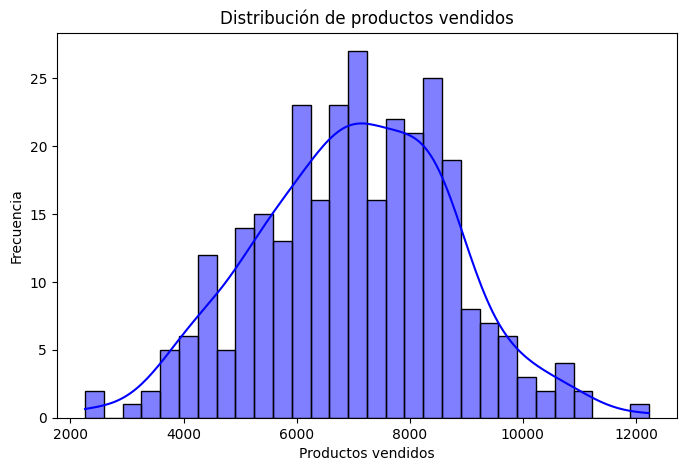

In [14]:
# Visualización de la distribución de la variable objetivo 'Product_Sold'
plt.figure(figsize=(8, 5))
sns.histplot(df["Product_Sold"], bins=30, kde=True, color="blue")
plt.xlabel("Productos vendidos")
plt.ylabel("Frecuencia")
plt.title("Distribución de productos vendidos")
plt.show()

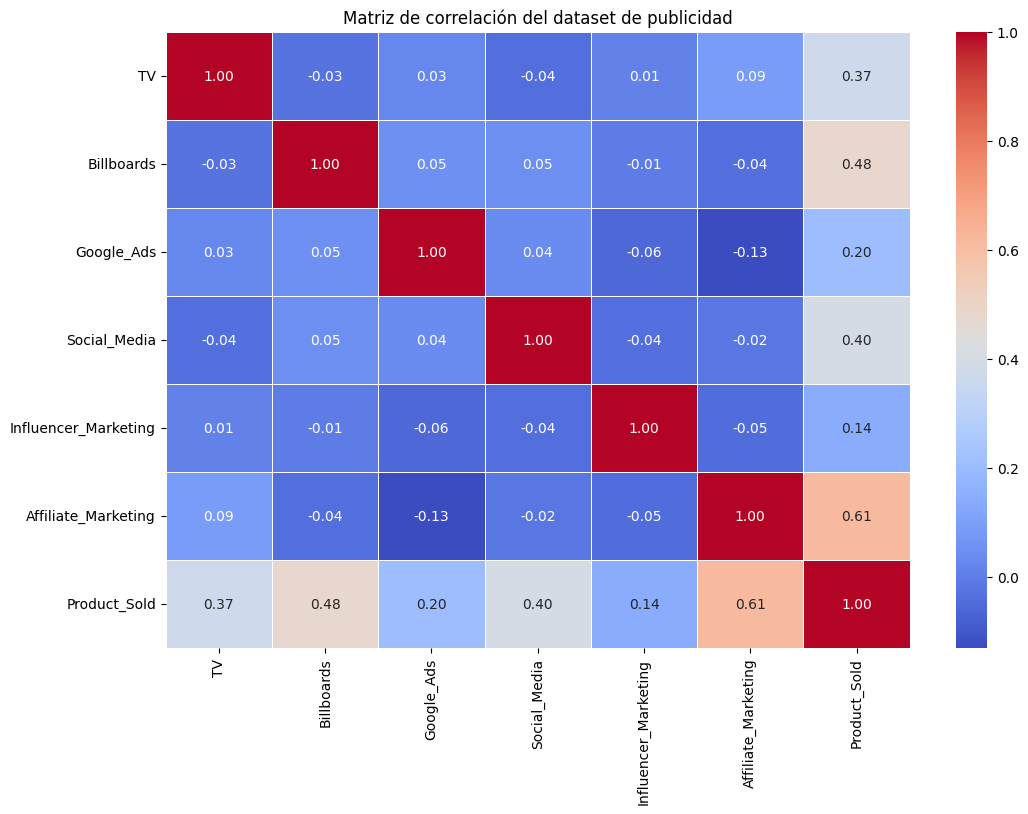

In [15]:
# Visualización de la matriz de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación del dataset de publicidad")
plt.show()


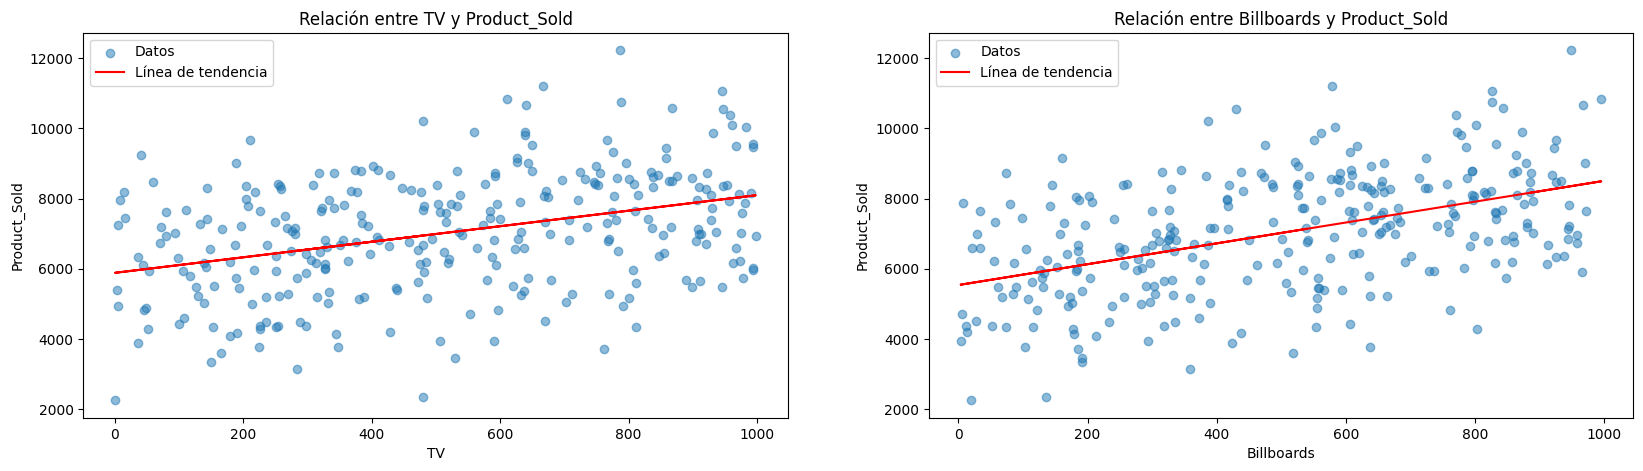

In [16]:
# Visualización de la relación entre algunas características y la variable objetivo
features = ['TV', 'Billboards']  # Ejemplo de características
target = df['Product_Sold']

plt.figure(figsize=(20, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o', alpha=0.5, label="Datos")
    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(x, poly1d_fn(x), color="red", label="Línea de tendencia")
    plt.title(f'Relación entre {col} y Product_Sold')
    plt.xlabel(col)
    plt.ylabel('Product_Sold')
    plt.legend()
plt.show()

In [17]:
# Preparar los datos para el modelo
X = df.drop("Product_Sold", axis=1)  # Características
y = df["Product_Sold"]  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Entrenar y evaluar el modelo
model = LinearRegression()
model.fit(X_train, y_train)  # Entrenar el modelo
y_pred = model.predict(X_test)  # Hacer predicciones

# Calcular y mostrar métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 7.085373922626112
MSE: 75.36591771292059
RMSE: 8.681354601265898
R²: 0.9999736866138691


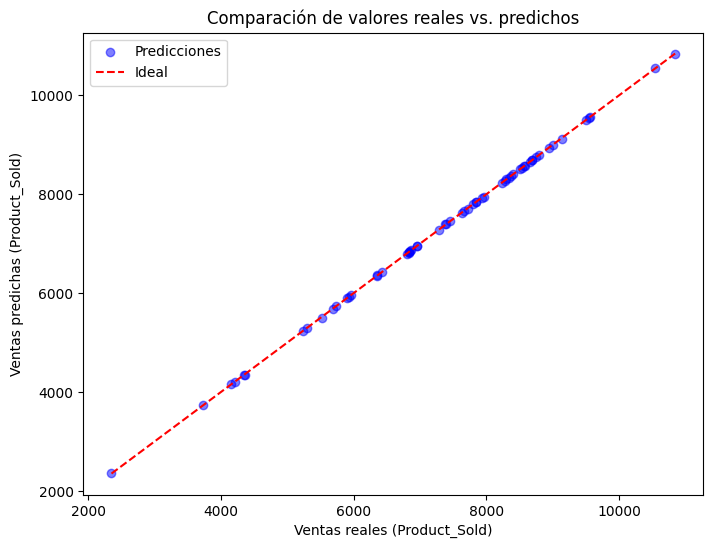

In [19]:
# Visualización de resultados
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label="Ideal")
plt.xlabel("Ventas reales (Product_Sold)")
plt.ylabel("Ventas predichas (Product_Sold)")
plt.title("Comparación de valores reales vs. predichos")
plt.legend()
plt.show()